In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными:
Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015). 
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.

In [22]:
import matplotlib.style as style
style.use('fivethirtyeight')

Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму.

In [11]:
url = 'creditcard.csv'
bmi = pd.read_csv(url)

In [13]:
bmi.shape

(284807, 31)

In [14]:
bmi.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
bmi.iloc[:, :31].head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


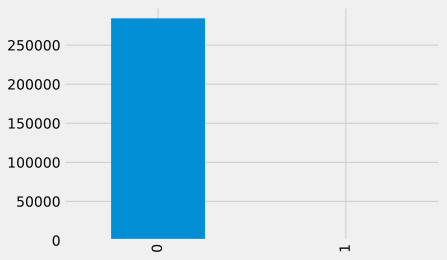

In [28]:
bmi_s = bmi['Class'].value_counts()
bmi_s.plot(kind='bar')
plt.show()

Затем постройте такую же диаграмму, используя логарифмический масштаб.

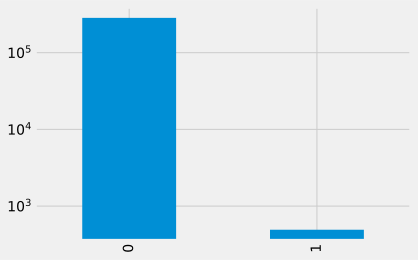

In [29]:
bmi_s.plot(kind='bar')
plt.yscale(value='log')
plt.show()

На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0).

(array([ 3.,  4.,  5.,  3.,  3.,  3.,  3.,  3.,  6.,  8.,  9.,  6., 15.,
         7.,  9., 11., 20., 33., 48., 63., 91., 73., 66.]),
 array([-30.55238004, -29.13130326, -27.71022647, -26.28914969,
        -24.8680729 , -23.44699612, -22.02591933, -20.60484255,
        -19.18376576, -17.76268897, -16.34161219, -14.9205354 ,
        -13.49945862, -12.07838183, -10.65730505,  -9.23622826,
         -7.81515148,  -6.39407469,  -4.97299791,  -3.55192112,
         -2.13084433,  -0.70976755,   0.71130924,   2.13238602]),
 <a list of 23 Patch objects>)

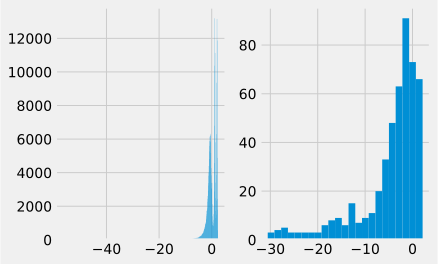

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.hist(bmi.loc[bmi.Class == 0].V1, bins='auto')
ax2.hist(bmi.loc[bmi.Class == 1].V1, bins='auto')

Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “Class”.

Text(0.5, 1.0, 'Class 1')

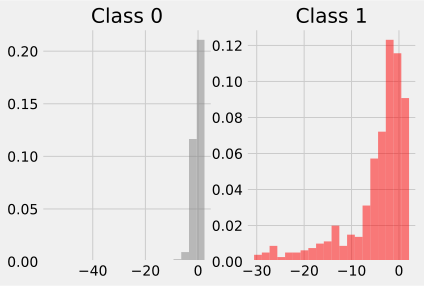

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
ax1.hist(bmi.loc[bmi.Class == 0].V1, bins=20,alpha=0.5, color = '#808080', density=True)
ax1.set_title('Class 0')
ax2.hist(bmi.loc[bmi.Class == 1].V1, bins=20,alpha=0.5, color = 'Red',density=True)
ax2.set_title('Class 1')